In [42]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashaychoudhary/heart-attack-in-youth-vs-adult-in-south-africa")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/heart-attack-in-youth-vs-adult-in-south-africa


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')
sns.set()

In [44]:
df = pd.read_csv('/kaggle/input/heart-attack-in-youth-vs-adult-in-south-africa/heart_attack_south_africa.csv')
df.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


In [45]:
df.shape

(100000, 20)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patient_ID                    100000 non-null  int64  
 1   Age                           100000 non-null  int64  
 2   Gender                        100000 non-null  object 
 3   Cholesterol_Level             100000 non-null  int64  
 4   Blood_Pressure_Systolic       100000 non-null  int64  
 5   Blood_Pressure_Diastolic      100000 non-null  int64  
 6   Smoking_Status                100000 non-null  object 
 7   Alcohol_Intake                100000 non-null  object 
 8   Physical_Activity             100000 non-null  object 
 9   Obesity_Index                 100000 non-null  float64
 10  Diabetes_Status               100000 non-null  object 
 11  Family_History_Heart_Disease  100000 non-null  object 
 12  Diet_Quality                  100000 non-null

In [47]:
df.isnull().sum()

Patient_ID                      0
Age                             0
Gender                          0
Cholesterol_Level               0
Blood_Pressure_Systolic         0
Blood_Pressure_Diastolic        0
Smoking_Status                  0
Alcohol_Intake                  0
Physical_Activity               0
Obesity_Index                   0
Diabetes_Status                 0
Family_History_Heart_Disease    0
Diet_Quality                    0
Stress_Level                    0
Heart_Attack_History            0
Medication_Usage                0
Triglycerides_Level             0
LDL_Level                       0
HDL_Level                       0
Heart_Attack_Outcome            0
dtype: int64

In [48]:
df.drop(columns = ['Patient_ID'], axis = 1, inplace = True)

In [49]:
df.head()

,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


In [50]:
df.columns

Index(['Age', 'Gender', 'Cholesterol_Level', 'Blood_Pressure_Systolic',
       'Blood_Pressure_Diastolic', 'Smoking_Status', 'Alcohol_Intake',
       'Physical_Activity', 'Obesity_Index', 'Diabetes_Status',
       'Family_History_Heart_Disease', 'Diet_Quality', 'Stress_Level',
       'Heart_Attack_History', 'Medication_Usage', 'Triglycerides_Level',
       'LDL_Level', 'HDL_Level', 'Heart_Attack_Outcome'],
      dtype='object')

In [51]:
df.duplicated().sum()

0

In [52]:
df['Heart_Attack_Outcome'].value_counts()

Heart_Attack_Outcome
1    58732
0    41268
Name: count, dtype: int64

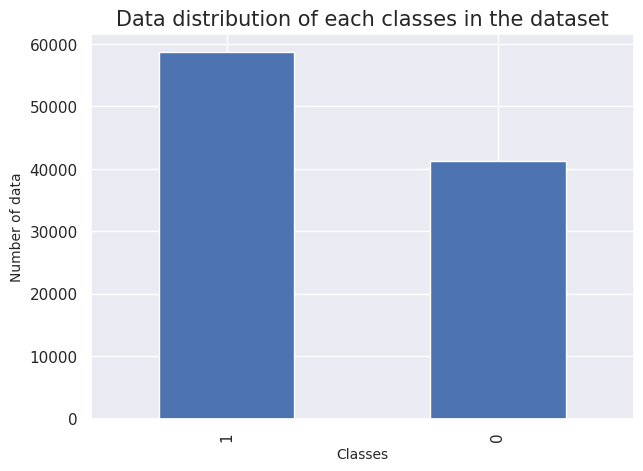

In [53]:
df['Heart_Attack_Outcome'].value_counts().plot(kind = 'bar', figsize = (7, 5))
plt.title('Data distribution of each classes in the dataset', fontsize = 15)
plt.xlabel('Classes', fontsize = 10)
plt.ylabel('Number of data', fontsize = 10)
plt.show()

In [54]:
categorical_columns, numerical_columns = [], []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [55]:
numerical_columns.remove('Heart_Attack_Outcome')

In [56]:
print(numerical_columns)

['Age', 'Cholesterol_Level', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Obesity_Index', 'Triglycerides_Level', 'LDL_Level', 'HDL_Level']


In [57]:
print(categorical_columns)

['Gender', 'Smoking_Status', 'Alcohol_Intake', 'Physical_Activity', 'Diabetes_Status', 'Family_History_Heart_Disease', 'Diet_Quality', 'Stress_Level', 'Heart_Attack_History', 'Medication_Usage']


In [58]:
for column in categorical_columns:
    print('The number of unique values in', column, 'column is:', df[column].nunique())
    print('\n')
    print('The unique values in', column, 'column are:', df[column].unique())
    print('\n')
    print('The value counts of', column, 'column is:', df[column].value_counts())
    print('============================================================================')

The number of unique values in Gender column is: 2


The unique values in Gender column are: ['Female' 'Male']


The value counts of Gender column is: Gender
Female    50180
Male      49820
Name: count, dtype: int64
The number of unique values in Smoking_Status column is: 2


The unique values in Smoking_Status column are: ['No' 'Yes']


The value counts of Smoking_Status column is: Smoking_Status
No     69989
Yes    30011
Name: count, dtype: int64
The number of unique values in Alcohol_Intake column is: 3


The unique values in Alcohol_Intake column are: ['High' 'Low' 'Moderate']


The value counts of Alcohol_Intake column is: Alcohol_Intake
Moderate    40262
Low         39772
High        19966
Name: count, dtype: int64
The number of unique values in Physical_Activity column is: 3


The unique values in Physical_Activity column are: ['Sedentary' 'Highly Active' 'Active']


The value counts of Physical_Activity column is: Physical_Activity
Sedentary        50275
Active           29810


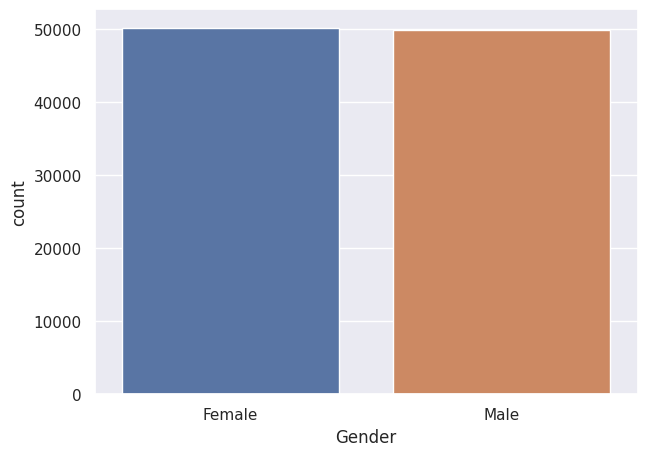

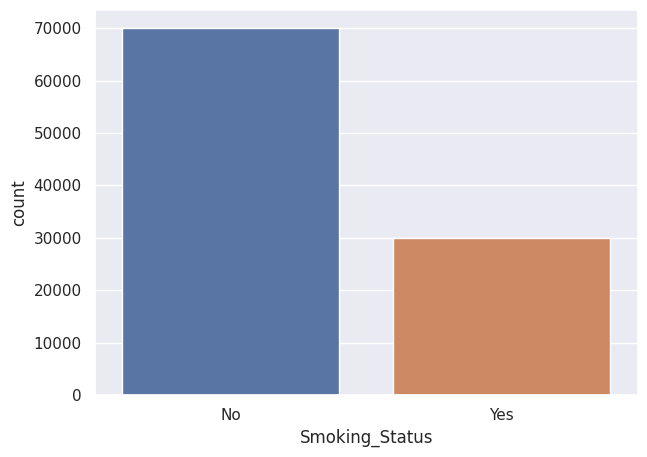

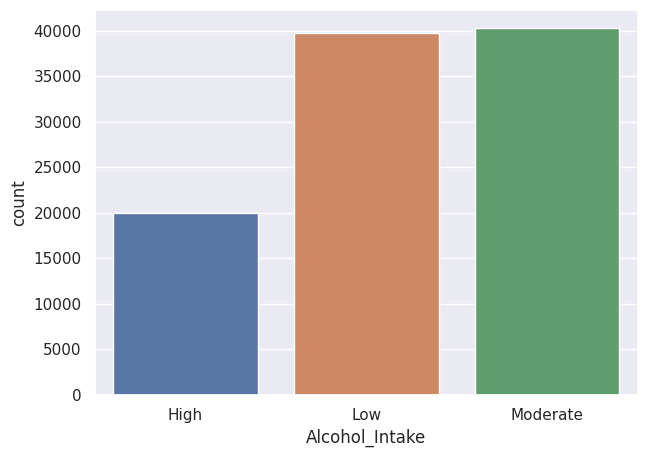

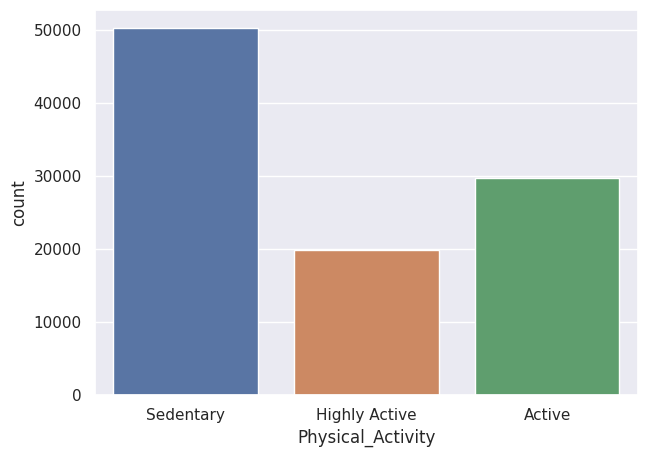

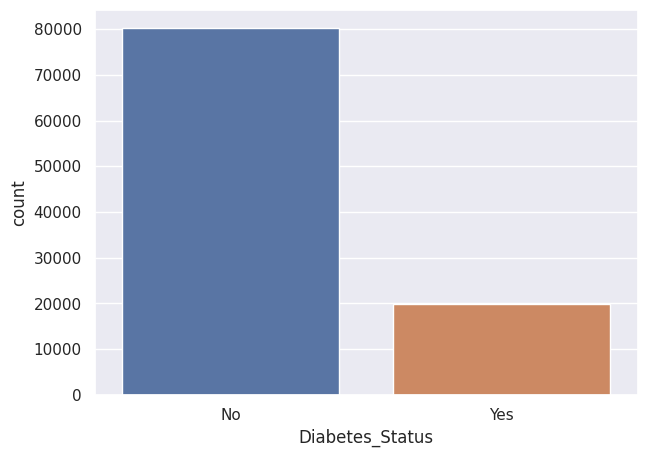

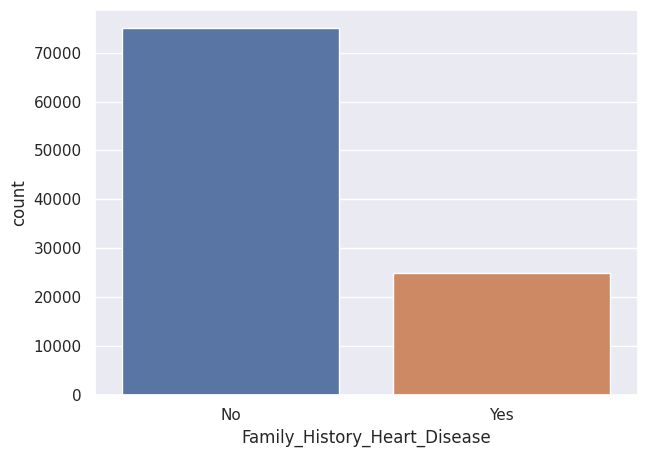

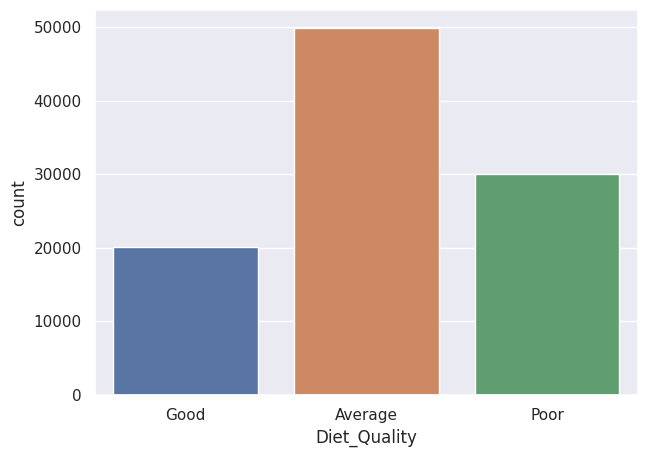

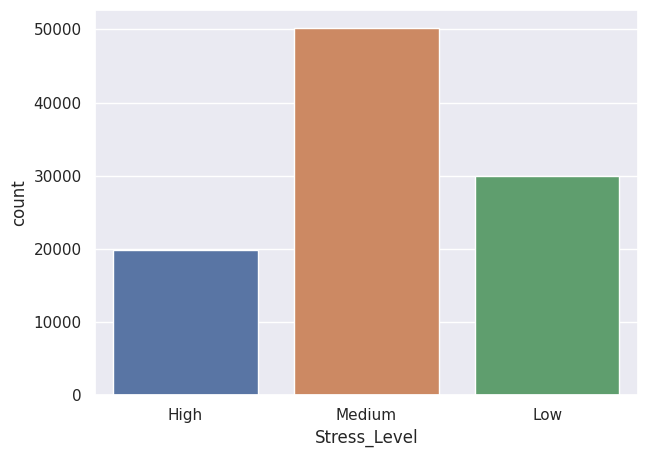

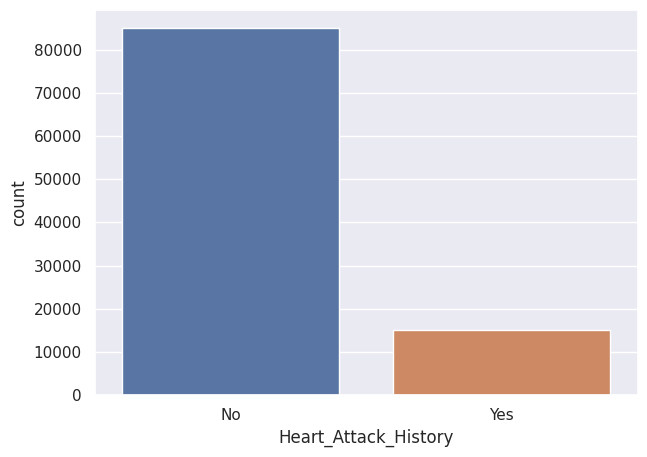

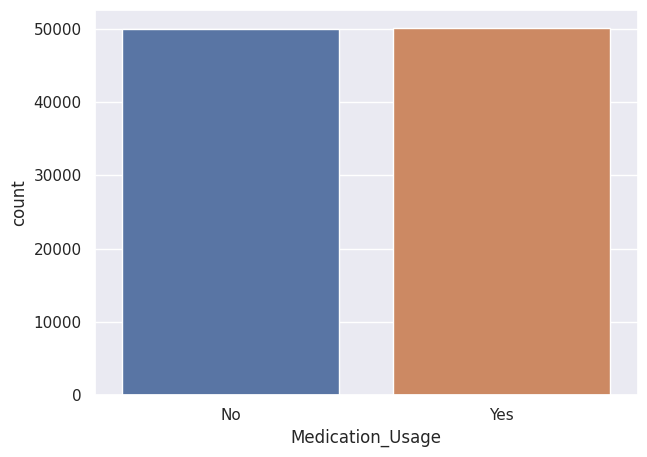

In [59]:
for column in categorical_columns:
    plt.figure(figsize = (7, 5))
    sns.countplot(data = df, x = column)
    plt.show()

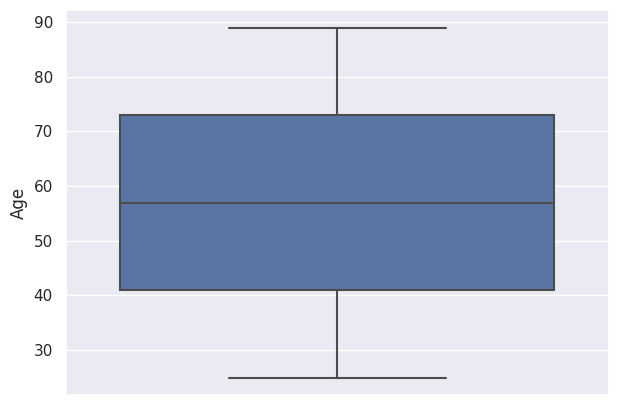

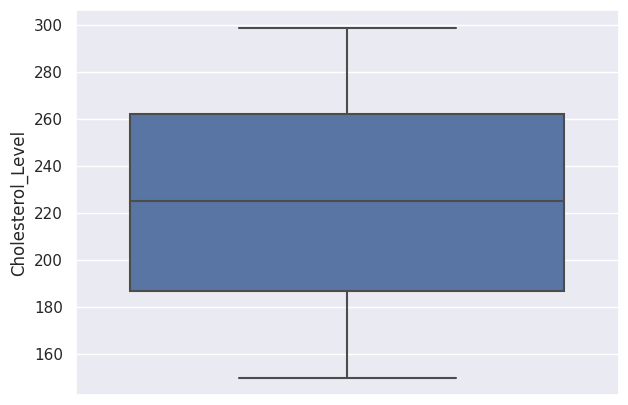

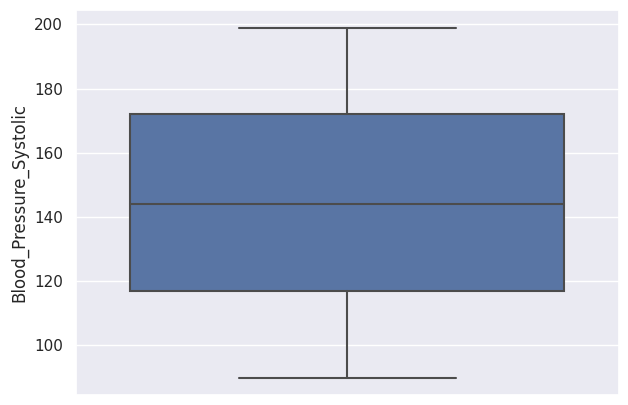

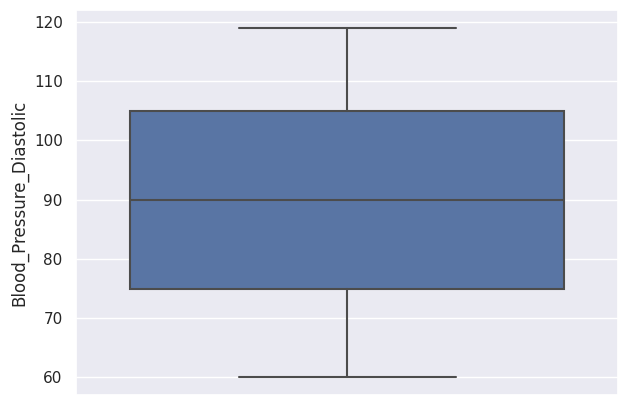

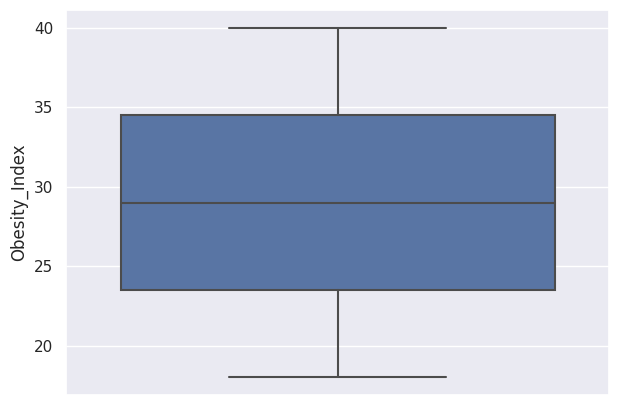

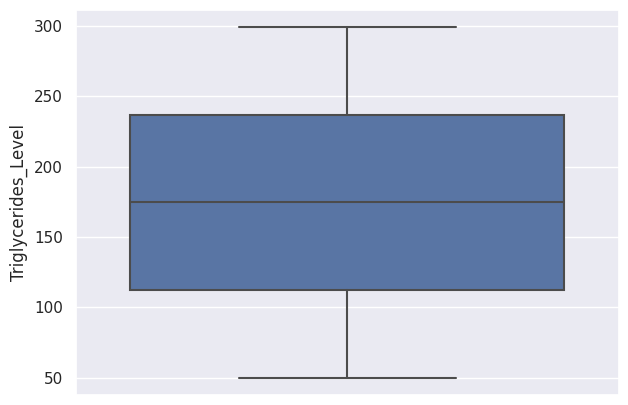

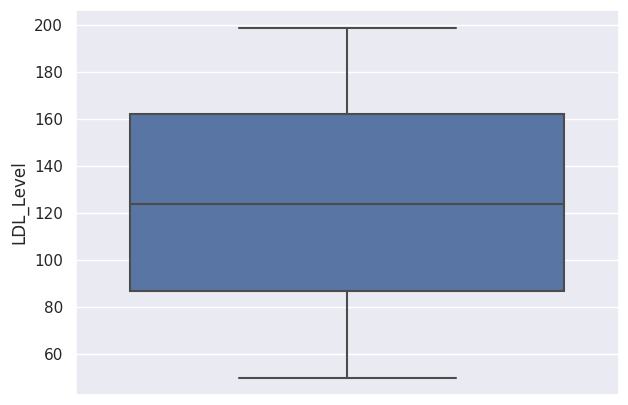

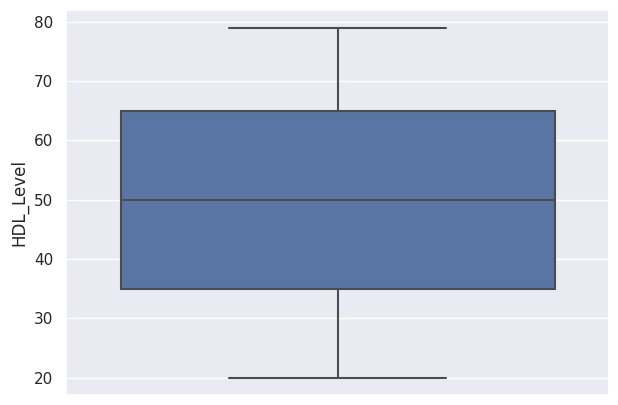

In [60]:
for column in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.boxplot(data = df, y = column)
    plt.show()

In [61]:
df.describe()

,Age,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Obesity_Index,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,56.929210,224.578740,144.317750,89.591950,29.004788,174.629860,124.333400,49.547090,0.587320
std,18.776713,43.316257,31.759636,17.277238,6.343317,72.118654,43.340624,17.350927,0.492319
min,25.000000,150.000000,90.000000,60.000000,18.000000,50.000000,50.000000,20.000000,0.000000
25%,41.000000,187.000000,117.000000,75.000000,23.500000,112.000000,87.000000,35.000000,0.000000
50%,57.000000,225.000000,144.000000,90.000000,29.000000,175.000000,124.000000,50.000000,1.000000
75%,73.000000,262.000000,172.000000,105.000000,34.500000,237.000000,162.000000,65.000000,1.000000
max,89.000000,299.000000,199.000000,119.000000,40.000000,299.000000,199.000000,79.000000,1.000000


In [62]:
X = df.drop(columns = ['Heart_Attack_Outcome'])
y = df['Heart_Attack_Outcome']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle = True, stratify = y)

In [64]:
df.corr(numeric_only = True)['Heart_Attack_Outcome'].sort_values(ascending = True)

Triglycerides_Level        -0.003899
HDL_Level                  -0.003492
LDL_Level                   0.003568
Blood_Pressure_Diastolic    0.140187
Blood_Pressure_Systolic     0.148573
Cholesterol_Level           0.283860
Obesity_Index               0.296385
Age                         0.298683
Heart_Attack_Outcome        1.000000
Name: Heart_Attack_Outcome, dtype: float64

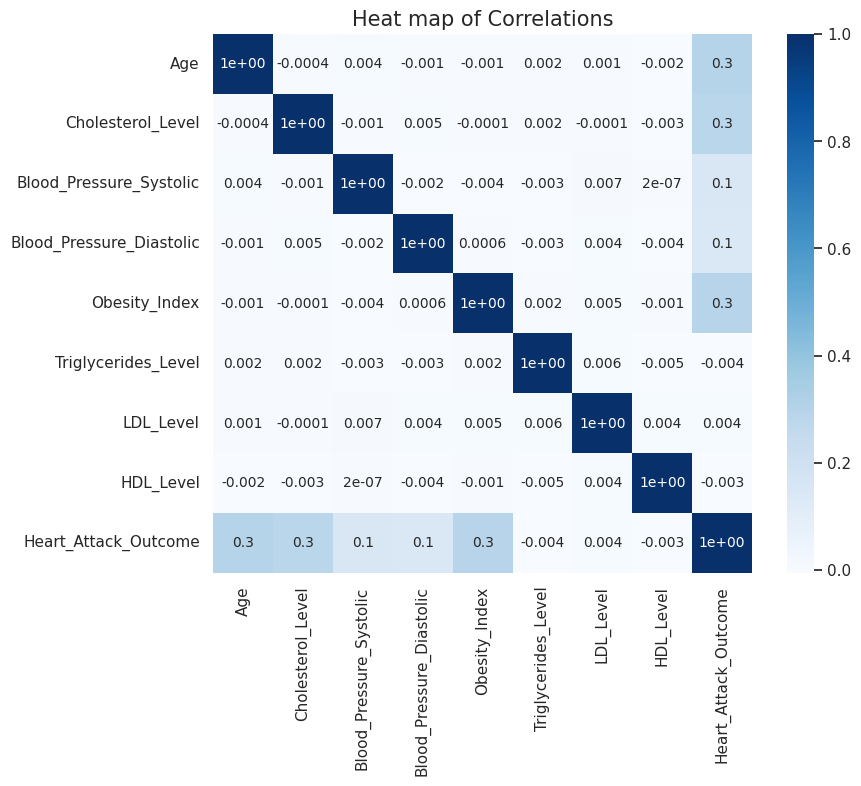

In [65]:
plt.figure(figsize = (9, 7))
sns.heatmap(df.corr(numeric_only = True), annot = True, square = True, cbar = True, annot_kws = {'size' : 10}, fmt = '.1', 
            cmap = 'Blues')
plt.title('Heat map of Correlations', fontsize = 15)
plt.show()

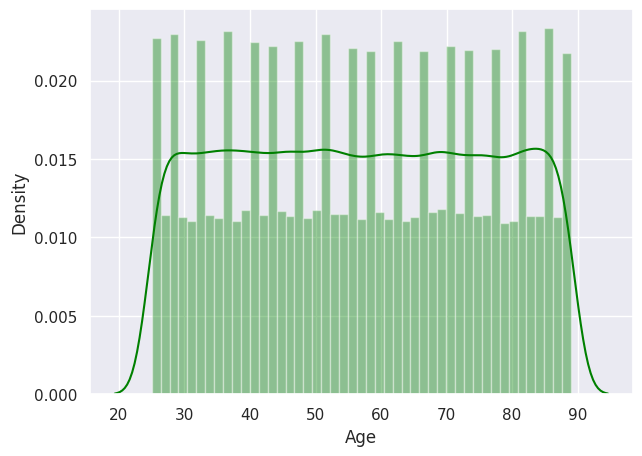

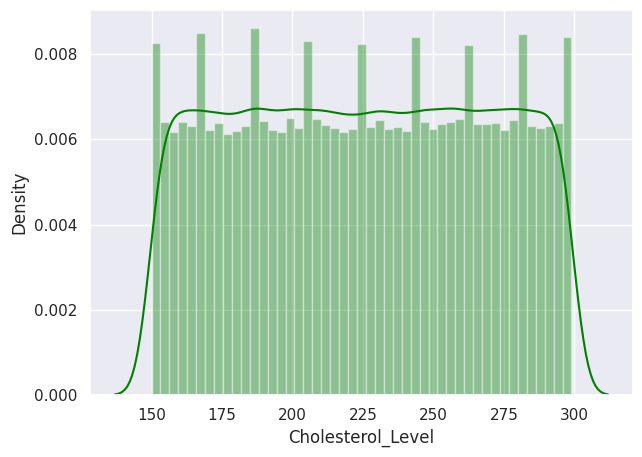

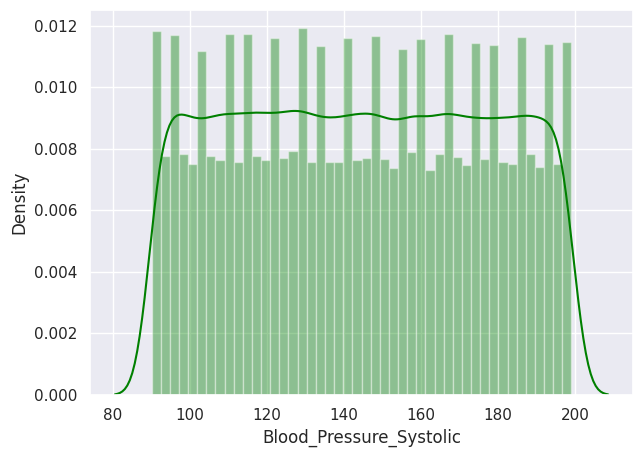

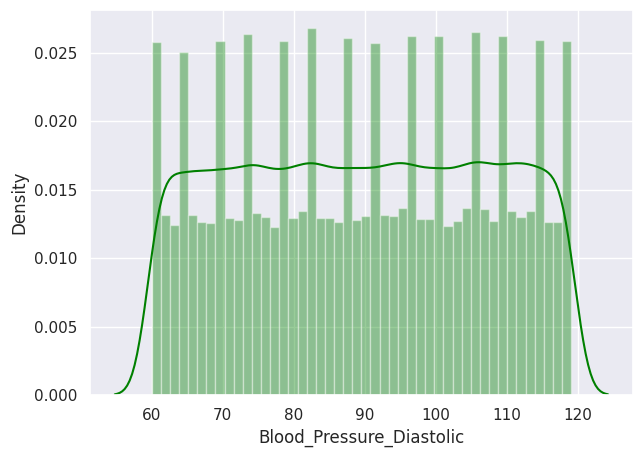

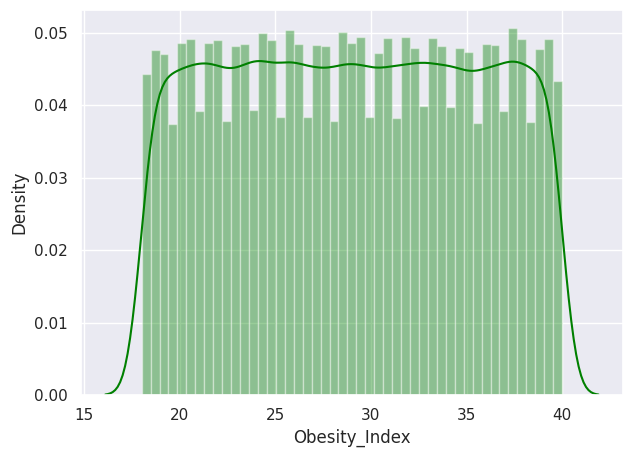

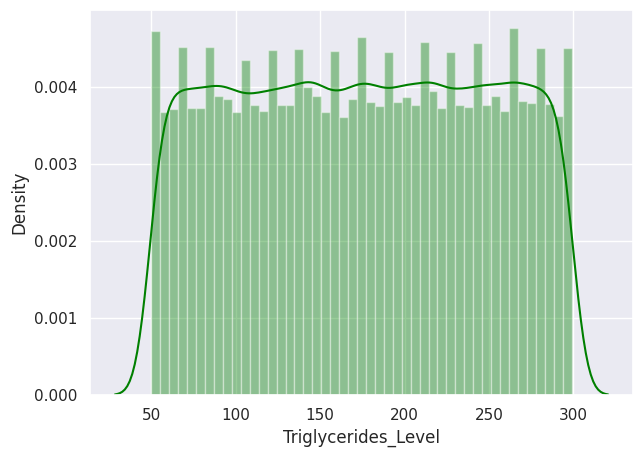

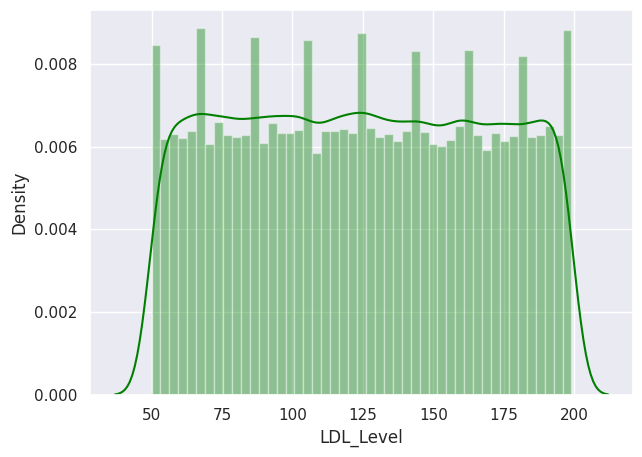

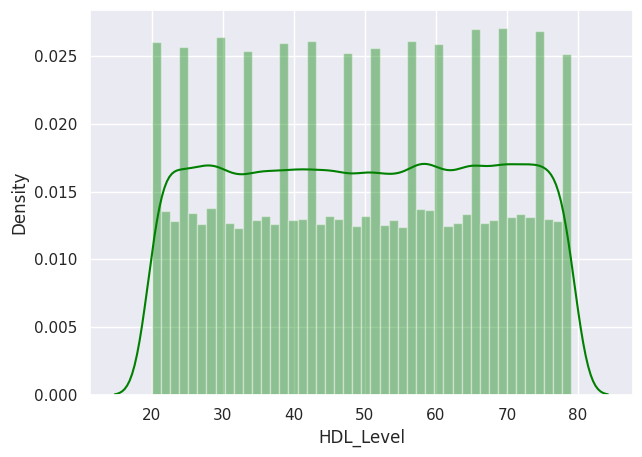

In [66]:
for column in numerical_columns:
    plt.figure(figsize = (7, 5))
    sns.distplot(df[column], color = 'green')
    plt.show()

In [67]:
clf = ColumnTransformer(transformers = [
    ('encoder', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), categorical_columns),
    ('scaler', MinMaxScaler(), numerical_columns)
], remainder = 'passthrough')

In [68]:
X_train_f = clf.fit_transform(X_train)

In [69]:
X_train_f

array([[0.        , 1.        , 1.        , ..., 0.58232932, 0.8590604 ,
        0.54237288],
       [1.        , 0.        , 1.        , ..., 0.34939759, 0.18791946,
        0.13559322],
       [0.        , 0.        , 0.        , ..., 0.70682731, 0.60402685,
        0.81355932],
       ...,
       [1.        , 0.        , 0.        , ..., 0.27309237, 0.61744966,
        0.74576271],
       [1.        , 1.        , 1.        , ..., 0.96787149, 0.08053691,
        0.18644068],
       [0.        , 0.        , 0.        , ..., 0.93574297, 0.79865772,
        0.74576271]])

In [70]:
mnb = MultinomialNB()

In [71]:
cvs_mnb = cross_val_score(mnb, X_train_f, y_train, cv = 5)

In [72]:
print('The validation accuracy of Multinomial Naive Bayes model is:', cvs_mnb.mean())

The validation accuracy of Multinomial Naive Bayes model is: 0.7427874999999999


In [73]:
gnb = GaussianNB()

In [74]:
cvs_gnb = cross_val_score(gnb, X_train_f, y_train, cv = 5)

In [75]:
print('The validation accuracy of Gaussian Naive Bayes model is:', cvs_gnb.mean())

The validation accuracy of Gaussian Naive Bayes model is: 0.8201375000000001


In [77]:
X_train.head()

,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level
45872,52,Female,175,175,61,Yes,Low,Active,30.3,No,No,Average,Low,No,No,195,178,52
29057,31,Male,246,177,118,No,Low,Active,21.2,No,Yes,Average,Medium,No,No,137,78,28
75413,48,Female,275,118,64,No,Moderate,Sedentary,28.3,No,No,Good,Medium,No,No,226,140,68
68707,45,Female,221,113,75,No,High,Sedentary,34.0,No,No,Good,Low,No,Yes,65,65,57
31631,55,Female,204,188,70,No,Low,Active,21.8,No,No,Average,Low,No,Yes,231,59,42


In [78]:
X_train2 = X_train[['Age', 'Cholesterol_Level', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 'Obesity_Index',
                   'Triglycerides_Level', 'LDL_Level', 'HDL_Level']]

In [80]:
X_train2.head()

,Age,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Obesity_Index,Triglycerides_Level,LDL_Level,HDL_Level
45872,52,175,175,61,30.3,195,178,52
29057,31,246,177,118,21.2,137,78,28
75413,48,275,118,64,28.3,226,140,68
68707,45,221,113,75,34.0,65,65,57
31631,55,204,188,70,21.8,231,59,42


In [81]:
clf2 = ColumnTransformer(transformers = [
    ('scaler', MinMaxScaler(), [0, 1, 2, 3, 4, 5, 6, 7])
], remainder = 'passthrough')

In [82]:
X_train2_f = clf2.fit_transform(X_train2)

In [83]:
cvs_gnb2 = cross_val_score(gnb, X_train2_f, y_train, cv = 5)

In [84]:
cvs_gnb2.mean()

0.7473875

In [85]:
X_train3 = X_train.drop(columns = ['Age', 'Cholesterol_Level', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 
                                   'Obesity_Index', 'Triglycerides_Level', 'LDL_Level', 'HDL_Level'], axis = 1)

In [86]:
X_train3.head()

,Gender,Smoking_Status,Alcohol_Intake,Physical_Activity,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage
45872,Female,Yes,Low,Active,No,No,Average,Low,No,No
29057,Male,No,Low,Active,No,Yes,Average,Medium,No,No
75413,Female,No,Moderate,Sedentary,No,No,Good,Medium,No,No
68707,Female,No,High,Sedentary,No,No,Good,Low,No,Yes
31631,Female,No,Low,Active,No,No,Average,Low,No,Yes


In [87]:
clf3 = ColumnTransformer(transformers = [
    ('encoder', OneHotEncoder(drop = 'first', handle_unknown = 'ignore'), [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
], remainder = 'passthrough')

In [88]:
X_train3_f = clf3.fit_transform(X_train3)

In [89]:
cvs_mnb2 = cross_val_score(mnb, X_train3_f, y_train, cv = 5)

In [90]:
cvs_mnb2.mean()

0.723475

In [99]:
pipeline = Pipeline([
    ('clf', clf),
    ('model', GaussianNB())
])

In [100]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('clf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Gender', 'Smoking_Status',
                                                   'Alcohol_Intake',
                                                   'Physical_Activity',
                                                   'Diabetes_Status',
                                                   'Family_History_Heart_Disease',
                                                   'Diet_Quality',
                                                   'Stress_Level',
                                                   'Heart_Attack_History',
                                                   'Medication_Usage']),
                                                 ('scaler', MinMaxScaler(),
                                                  ['Age', 'Cholesterol_Level',
                                                   'Blood_Pressure_Systolic',
                                                   'Blood_Pressure_Diastolic',
                                                   'Obesity_Index',
                                                   'Triglycerides_Level',
                                                   'LDL_Level',
                                                   'HDL_Level'])])),
                ('model', GaussianNB())])

In [101]:
y_pred = pipeline.predict(X_test)

In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      8254
           1       0.84      0.87      0.85     11746

    accuracy                           0.82     20000
   macro avg       0.82      0.81      0.82     20000
weighted avg       0.82      0.82      0.82     20000



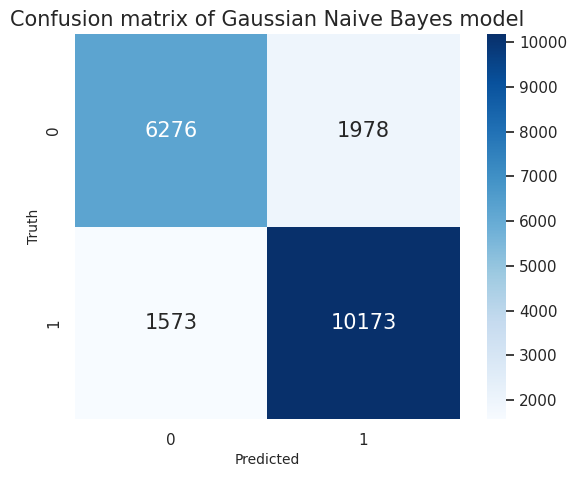

In [104]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, square = True, cbar = True, annot_kws = {'size' : 15}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion matrix of Gaussian Naive Bayes model', fontsize = 15)
plt.xlabel('Predicted', fontsize = 10)
plt.ylabel('Truth', fontsize = 10)
plt.show()